# <font color='black'>Introduction to Machine Learning</font>

---

## <font color='black'>Contents</font>

---
 
1. [Set-Up](#Set-Up)
2. [Multi-class Classification](#NN)
 * [Visualizing the data](#MR)
 * [Vectorizing logistic regression](#MR)
 * [One-vs-all classication](#MR)



The objective of this  session is to introduce and code our first neural network.


## <font color='black'>Set-Up</font>

---

First we will import the packages that we will need throughout the notebook.

In [124]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## <font color='black'>Multi-class Classification</font>

---

In this exercise, we will use logistic regression to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show how the methods we've learned can be used for this classication task. In the first part of the exercise, we will extend our previous implemention of logistic regression and apply it to one-vs-all classification.


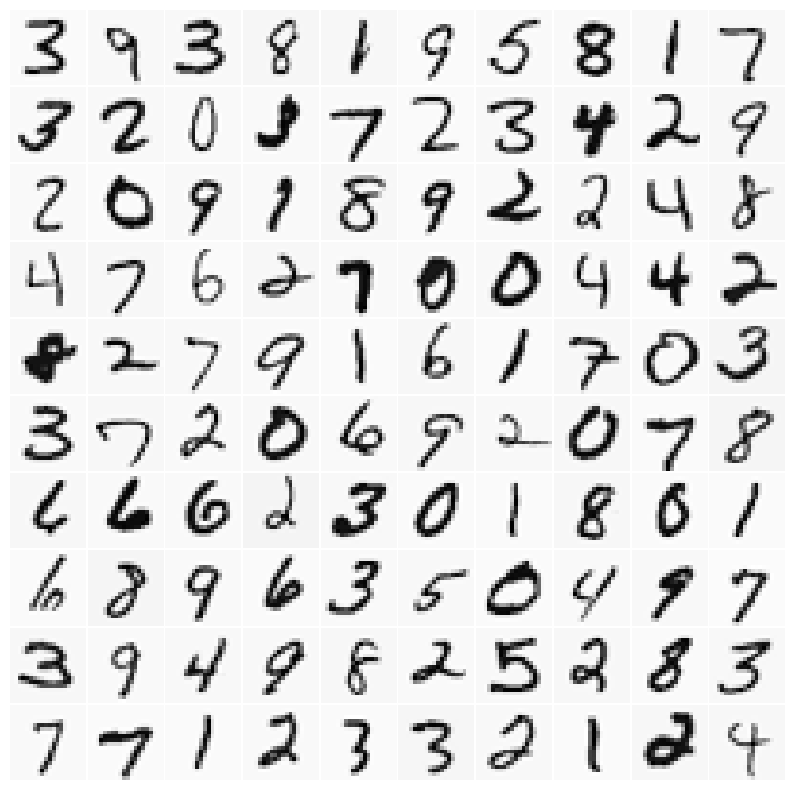

In [125]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
y[y == 10] = 0

# get number of examples in dataset
m = y.size

# randomly permute examples, to be used for visualizing one 
# picture at a time
indices = np.random.permutation(m)

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)


###  Vectorizing logistic regression
We will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers. To make this training efficient, it is important to ensure that our code is well vectorized. In this section, we will implement a vectorized version of logistic regression that does not employ any for loops.

#### Vectorizing the cost function
We will begin by writing a vectorized version of the cost function. Recall that in (unregularized) logistic regression, the cost function is 

$$ J(\boldsymbol{\theta}) = -\frac{1}{N}\sum_{i=1}^{N}y^{(i)} \ln\left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}\right)+ (1-y^{(i)})\ln\left(1-\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}\right),
$$

It turns out that we can compute this quickly for all our examples by using matrix multiplication. Let us define $\boldsymbol{X}$ and $\boldsymbol{\theta}$ as

$$ 
 \boldsymbol{X}\boldsymbol{\theta} = \begin{bmatrix}
(\boldsymbol{x}^{(1)})^T \boldsymbol{\theta}\\
\vdots \\
(\boldsymbol{x}^{(N)})^T \boldsymbol{\theta}
\end{bmatrix}
$$
This allows us to compute the products $\boldsymbol{x}^{(i)})^T \boldsymbol{\theta}$ for all our examples $i$ in one line of code. Our job is to write the unregularized cost function lrCostFunction Our implementation should use the strategy we presented above to calculate . We should also use a vectorized approach for the rest of the cost function. A fully vectorized version of lrCostFunction should not contain any loops.

#### Vectorizing the gradient
Recall that the gradient of the (unregularized) logistic regression cost is a vector defined as

$$ \nabla J(\boldsymbol{\theta}) = \frac{\delta J(\boldsymbol{\theta})}{\delta \boldsymbol{\theta}} =  \frac{1}{N}\sum_{i=1}^{N} \left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}-y^{(i)}\right)\boldsymbol{x}^{(i)}, $$

To vectorize this operation over the dataset, we start by writing out all the partial derivatives explicitly for all $\boldsymbol{\theta}_j$

$$ 
 \begin{bmatrix}
 \frac{\delta J(\boldsymbol{\theta})}{\delta \boldsymbol{\theta}_0}\\
\vdots \\
 \frac{\delta J(\boldsymbol{\theta})}{\delta \boldsymbol{\theta}_M}
\end{bmatrix} = \frac{1}{N} \begin{bmatrix}
 \sum_{i=1}^{N} \left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}-y^{(i)}\right)x^{(i)}_0\\
\vdots \\
 \sum_{i=1}^{N} \left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}-y^{(i)}\right)x^{(i)}_M
\end{bmatrix} = \frac{1}{N} \boldsymbol{X}^T \left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}-y^{(i)}\right)
$$
where 

$$
\left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}-y^{(i)}\right) = \begin{bmatrix}
 \left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(1)}}}-y^{(1)}\right)\\
\vdots \\
  \left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(N)}}}-y^{(N)}\right)\\
\end{bmatrix}
$$
is a $N$ vector and $\boldsymbol{x}^{(i)}$ is $M+1$ vector.

The expression above allows us to compute all the partial derivatives without any loops.

#### Vectorizing regularized logistic regression
After we have implemented vectorization for logistic regression, we will now add regularization to the cost function. Recall that for regularized logistic regression, the cost function is defined as

$$ J(\boldsymbol{\theta}) = -\frac{1}{N}\sum_{i=1}^{N}y^{(i)} \ln\left(\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}\right)+ (1-y^{(i)})\ln\left(1-\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}}}\right) 
+ \frac{\lambda}{2N}\sum_{j=1}^{M}\theta_j,
$$

Note that we should not be regularizing $\theta_0$ which is used for the bias term. Correspondingly, the partial derivative of regularized logistic regression cost for $\theta_j$ is defined as

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{N} \sum_{i=1}^N \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{N} \sum_{i=1}^N \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{N}\theta_j \qquad \text{for } j \ge 1 $$

In [126]:
def sigmoid(z):
    z = np.array(z)
    
    g = 1 / (1 + np.exp(-z))
    return g

In [127]:
def lrCostFunction(theta, X, y, lambda_):    
    m = y.size  # number of training examples
    h = sigmoid(X.dot(theta))

    # Calculate the logistic regression cost function
    J = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))

    # Add regularization term to the cost function
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    J += reg_term

    # Calculate the gradient of the cost function
    grad = (1 / m) * X.T.dot(h - y)

    # Add regularization term to the gradient
    grad[1:] += (lambda_ / m) * theta[1:]
    return J, grad

In [128]:
theta_t = np.zeros(4); 
theta_t[:] = [-2, -1, 1, 2]
X_t = np.zeros((5,4))
X_t[:,0] = np.ones(5)
X_t[:,1:] = np.transpose(np.reshape(list(range(1,16)),(3,5))/10)
y_t = np.zeros(5)
y_t[:] =  [1, 0, 1, 0,1]
lambda_t = 3
cost, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost: {:.3f}'.format(cost))
print('Expected cost: 2.534819\n')
print('Gradients:\n'); print(grad)
print('Expected gradients:\n 0.146561 -0.548558 0.724722 1.398003')

Cost: 2.535
Expected cost: 2.534819

Gradients:

[ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:
 0.146561 -0.548558 0.724722 1.398003


### One-vs-all classication
In this part of the exercise, we will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the $K$ classes in our dataset. In the handwritten digits dataset, $K=10$ , but our code should work for any value of $K$ .

We should now complete the code of the function "oneVsAll" to train one classifier for each class. In particular, our code should return all the classifier parameters in a matrix $\boldsymbol{\Theta}\in \mathcal{R}^{K\times M+1}$, where each row of $\boldsymbol{\Theta}$ corresponds to the learned logistic regression parameters for one class. We can do this with a for loop from $1$ to $K$, training each classifier independently.
    
Note that the $y$ argument to this function is a vector of labels from $1$ to $10$, where we have mapped the digit '0' to the label 10 (to avoid confusions with indexing). When training the classifier for class $k\in(1,\cdots,K)$ we will want a $N$-dimensional vector of labels $y_j\in(0,1)$ where $j$ indicates whether the $j$-th training instance belongs to class $k$ $(y_j=1)$, or if it belongs to a different class $(y_j=0)$ We may find logical arrays helpful for this task.

##### Learning parameters  using `scipy.optimize`


As in the previous laboratory (Exercise_2), instead of taking gradient descent steps, we will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy is a `python` library for numerical computing. It provides an optimization module for minimization. The function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

If we have completed the `lrCostFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\boldsymbol{\Theta}$. Notice we only needed to provide a function calculating the cost and the gradient.


In [129]:
def oneVsAll(X, y, num_labels, lambda_):    
   

    # Some useful variables
    n, m = X.shape

    # We need to return the following variables correctly 
    all_theta = np.zeros((num_labels, m + 1))
    Cost = np.zeros(num_labels)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((n, 1)), X], axis=1)
     # Loop through each class (from 1 to num_labels)
    for label in range(1, num_labels + 1):
        # Create a binary vector for this class
        y_binary = (y == label).astype(int)

        # Initialize theta for this class
        initial_theta = np.zeros(X.shape[1])

        # Define the cost function for this class
        cost_function = lambda t: lrCostFunction(t, X, y_binary, lambda_)

        # Use the minimize function to find the optimal theta for this class
        result = optimize.minimize(cost_function, initial_theta, method='BFGS', jac=True, options={'maxiter': 50})

        # Store the optimal theta in the corresponding row of all_theta
        all_theta[label - 1, :] = result.x

        # Store the cost for this class
        Cost[label - 1] = result.fun

    return Cost, all_theta

In [130]:
num_labels = 10; # 10 labels, from 1 to 10 
lambda_ = 0.1
Cost, all_theta = oneVsAll(X, y, num_labels, lambda_)
print(Cost)

[0.02331194 0.06835999 0.07181151 0.05006111 0.07595126 0.0327992
 0.04532262 0.09330874 0.08792047 0.00011331]


#### One-vs-all prediction
After training our one-vs-all classifier, we can now use it to predict the digit contained in a given image. For each input, we should compute the 'probability' that it belongs to each class using the trained logistic regression classifiers. Our one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label $(1,2,\cdots,K)$ as the prediction for the input example.
    We should now complete the function predictOneVsAll to use the one-vs-all classifier to make predictions. Once we are done, run the code below to call our predictOneVsAll function using the learned value of $\boldsymbol{\Theta}$ . We should see that the training set accuracy is about 95.4% (i.e., it classifies 95.4% of the examples in the training set correctly).

In [131]:
def predictOneVsAll(all_theta, X):    
  
    # Make sure the input has two dimensions
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    
    # useful variables
    n, m = X.shape
    num_labels = all_theta.shape[0]

    # We need to return the following variables correctly 
    p = np.zeros(X.shape[0])

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((n, 1)), X], axis=1)

    # Compute the probability for each class using the trained theta values
    probabilities = sigmoid(X.dot(all_theta.T))

    # Find the class (label) with the highest probability for each example
    # The class with the highest probability is our prediction
    p = np.argmax(probabilities, axis=1)

    # Since the labels are 0-indexed in Python, we add 1 to match the expected labels (1, 2, ..., num_labels)
    p += 1
    return p

In [132]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 83.4%


Now we can  display some images from the training set one at a time, while at the same time printing out the predicted label for the displayed image.

One vs All Logistic Regression: 9


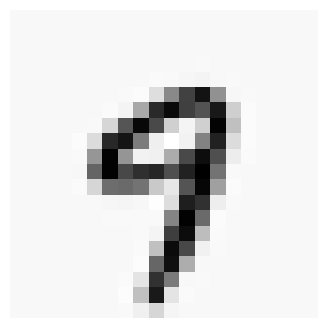

In [133]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predictOneVsAll(all_theta, X[i, :])
    print('One vs All Logistic Regression: {}'.format(*pred))
else:
    print('No more images to display!')